/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


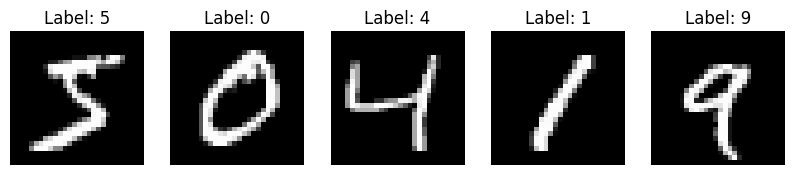

Split: 0.8:0.2, Model: SVM
Accuracy: 0.963, Precision: 0.9632375895833787, Recall: 0.963, F1-score: 0.9630137546410789
Confusion Matrix:
[[1310    1    5    1    0    5   11    5    5    0]
 [   0 1580    8    2    1    0    0    5    3    1]
 [   3    8 1323    8    8    3    5   11    9    2]
 [   1    3   15 1362    3   13    1   24    8    3]
 [   1    1    9    0 1247    2    5    6    3   21]
 [   2    3    3   18    2 1219   13    8    5    0]
 [   3    0    3    0    7    5 1365   10    3    0]
 [   2    4   10    1    6    1    0 1459    1   19]
 [   2    7   11   11    6   10    4   12 1290    4]
 [   5    6    6   12   20    0    0   38    6 1327]]


Split: 0.8:0.2, Model: Logistic Regression
Accuracy: 0.9164285714285715, Precision: 0.9161956599939324, Recall: 0.9164285714285715, F1-score: 0.9162172220800142
Confusion Matrix:
[[1286    1   11    0    1   11   21    4    6    2]
 [   0 1556    7   10    3    6    1    4   11    2]
 [   6   19 1233   18   13   13   20   18   2

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Convert DataFrame to NumPy array and reshape images
X = mnist.data.values.reshape(-1, 28, 28) / 255.0  # Reshape and normalize pixel values
y = mnist.target.astype(int)  # Use int instead of np.int

# Display a few images and labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

# Vectorize data
X = X.reshape(-1, 28*28)

# Data splitting
splits = [(0.8, 0.2), (0.5, 0.5), (0.2, 0.8), (0.01, 0.99)]

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    # Image preprocessing steps
    # Step 1: Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model selection and training
    models = {
        'SVM': SVC(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)  # Train model using standardized data
        y_pred = model.predict(X_test_scaled)

        # Model evaluation
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)

        print(f"Split: {train_size}:{test_size}, Model: {name}")
        print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")
        print("Confusion Matrix:")
        print(cm)
        print("\n")

